In [1]:
import json
taco_anns = r"C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\TACO\TACO-master\data\annotations.json"

In [2]:
#Read json annotation file
f = open(taco_anns)

data = json.load(f)

f.close

<function TextIOWrapper.close()>

In [3]:
#Show first image
sample = data['images'][0]
sample

{'id': 0,
 'width': 1537,
 'height': 2049,
 'file_name': 'batch_1/000006.jpg',
 'license': None,
 'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png',
 'coco_url': None,
 'date_captured': None,
 'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}

In [4]:
#Get image id
imId = sample['id']
imId

0

In [5]:
#extract relevant annotations
anns = data['annotations']
aoi = [] # annotations of interest
for i, annotation in enumerate(anns):
    if annotation['image_id'] == imId:
        aoi.append(i)

In [6]:
print(anns[aoi[0]])

{'id': 1, 'image_id': 0, 'category_id': 6, 'segmentation': [[561.0, 1238.0, 568.0, 1201.0, 567.0, 1175.0, 549.0, 1127.0, 538.0, 1089.0, 519.0, 1043.0, 517.0, 1005.0, 523.0, 964.0, 529.0, 945.0, 520.0, 896.0, 525.0, 862.0, 536.0, 821.0, 554.0, 769.0, 577.0, 727.0, 595.0, 678.0, 596.0, 585.0, 588.0, 346.0, 581.0, 328.0, 569.0, 306.0, 570.0, 276.0, 576.0, 224.0, 560.0, 205.0, 564.0, 170.0, 578.0, 154.0, 608.0, 136.0, 649.0, 127.0, 688.0, 127.0, 726.0, 129.0, 759.0, 141.0, 784.0, 153.0, 792.0, 177.0, 788.0, 193.0, 782.0, 209.0, 792.0, 238.0, 802.0, 271.0, 802.0, 294.0, 791.0, 319.0, 789.0, 360.0, 794.0, 395.0, 810.0, 529.0, 819.0, 609.0, 841.0, 675.0, 882.0, 728.0, 916.0, 781.0, 928.0, 802.0, 938.0, 834.0, 940.0, 856.0, 939.0, 873.0, 938.0, 884.0, 944.0, 901.0, 951.0, 917.0, 956.0, 942.0, 960.0, 972.0, 964.0, 1013.0, 959.0, 1036.0, 952.0, 1081.0, 952.0, 1106.0, 934.0, 1163.0, 935.0, 1174.0, 949.0, 1209.0, 954.0, 1235.0, 952.0, 1273.0, 953.0, 1296.0, 946.0, 1320.0, 930.0, 1347.0, 914.0, 136

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
taco_imdir = r"C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\TACO\TACO-master\data"

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


(0.0, 1.0, 0.0, 1.0)

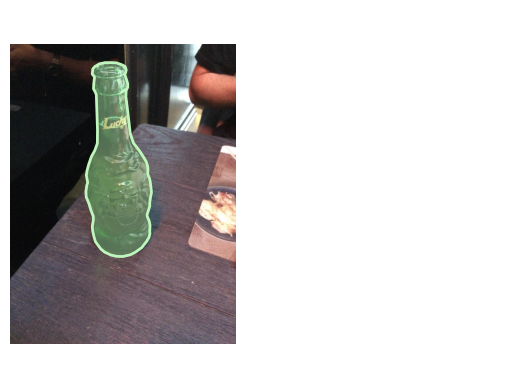

In [8]:
#https://stackoverflow.com/questions/72611475/how-can-i-extract-object-segmentations-from-the-coco-dataset
#https://stackoverflow.com/questions/50805634/how-to-create-mask-images-from-coco-dataset
from pycocotools.coco import COCO

imp = os.path.join(taco_imdir,sample['file_name'])
samp_im = cv2.cvtColor(cv2.imread(imp),cv2.COLOR_BGR2RGB)

#Show TACO image

coco = COCO(taco_anns)
img = coco.imgs[imId]

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(samp_im)

cat_ids = coco.getCatIds()

anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

mask = coco.annToMask(anns[0])


plt.subplot(1,2,2)
plt.axis('off')

In [9]:
anns[0]['bbox']

[517.0, 127.0, 447.0, 1322.0]

xy 517.0 127.0


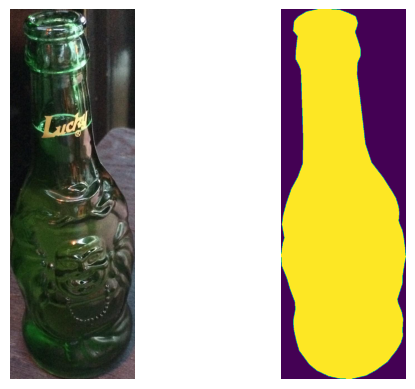

In [10]:
#Crop using bounding box coordinates
import numpy as np
img_h,img_w,c = samp_im.shape

#for coco, x,y, is top left bbox point, unlike yolo which is center point
[x,y,w,h] = anns[0]['bbox']
#x = int(x * img_w)
#y = int(y * img_h)

#h, w = mask.shape
print("xy", x,y)
#mask_img = samp_im[int(x):int(x+w), int(y-h):int(y),  :] 

cropped_img = samp_im[int(y):int(y+h), int(x):int(x+w),  :] 
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cropped_img)

plt.subplot(1,2,2)
plt.axis('off')

cropped_mask = mask[int(y):int(y+h), int(x):int(x+w)] 
plt.imshow(cropped_mask)



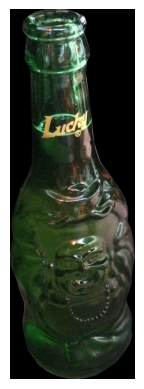

In [11]:
#Cutout rubbish using mask
cut = cv2.bitwise_and(cropped_img,cropped_img,mask = cropped_mask)
plt.axis('off')
plt.imshow(cut)

ImSize= (1080, 1920, 3)
OG litter size = (1322, 447, 3)


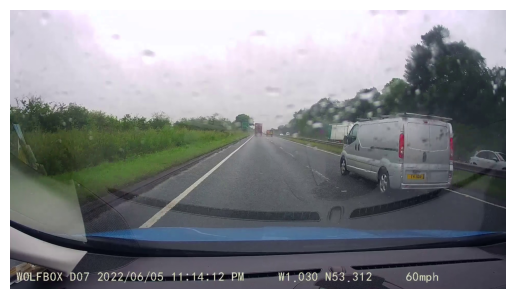

In [12]:
#Get image from verge set
vergeImP = r"C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg\20220605231413_000097_Trim_frame2.jpg"
verge = cv2.cvtColor(cv2.imread(vergeImP),cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(verge)
print("ImSize=",verge.shape)
print("OG litter size =", cut.shape)

New litter shape= (100, 33, 3)
New Mask shape= (100, 33)


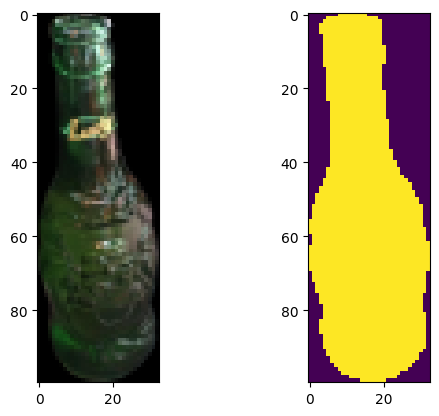

In [13]:
#Resize litter & mask to more suitable size

#https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

context_cut = image_resize(cut,height=100)
print("New litter shape=", context_cut.shape)

context_mask = image_resize(cropped_mask,height=100)
print("New Mask shape=", context_mask.shape)
plt.subplot(1,2,1)
plt.imshow(context_cut)
plt.subplot(1,2,2)
plt.imshow(context_mask)

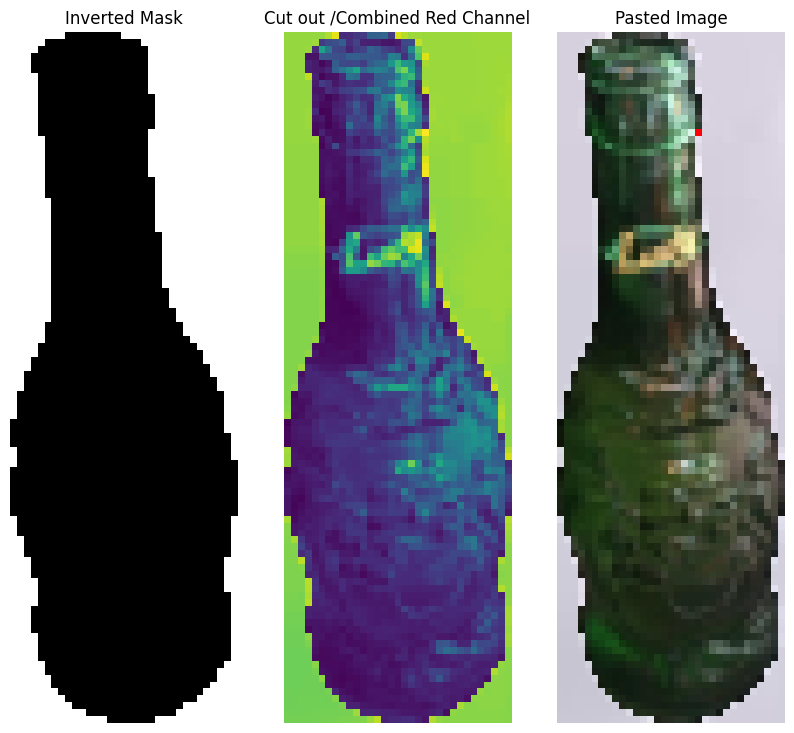

In [14]:
#Add images together
plt.figure(figsize=(10,10))
#https://www.binarystudy.com/2022/09/How-to-add-subtract-different-size-images-using-OpenCV-Python.html#:~:text=Alternatively%20you%20can%20use%20cv2.addWeighted%20%28%29%20to%20add,cv2.addWeighted%20%28img11%2C%200.3%2C%20img22%2C%200.7%2C%200%29%20plt.imshow%20%28img_add%29
height1, width1 = context_cut.shape[0],context_cut.shape[1]
height2, width2 = verge.shape[0],verge.shape[1]

# Find the minimum height and width of the two images
min_height = min(height1, height2)
min_width = min(width1, width2)

# Crop images with minimum height and width
foreground = context_cut[0:min_height, 0:min_width]
background = verge[0:min_height, 0:min_width]

(Rb, Gb, Bb) = cv2.split(background)
(Rf, Gf, Bf) = cv2.split(foreground)


#invert mask
norm_mask = 1-context_mask


#In each colour channel, cut out mask and add foreground channels
Rn = cv2.bitwise_and(Rb,Rb,mask=norm_mask) + Rf
Gn = cv2.bitwise_and(Gb,Gb,mask=norm_mask) + Gf
Bn = cv2.bitwise_and(Bb,Bb,mask=norm_mask) + Bf

#merge channels back together
new = cv2.merge([Rn,Gn,Bn])

plt.subplot(1,3,1)
plt.axis('off')
plt.title('Inverted Mask')
plt.imshow(norm_mask,cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Cut out /Combined Red Channel')
plt.imshow(Rn)

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Pasted Image')
plt.imshow(new)

# # Creatte ROI by adding the cropped images
# img_add = cv2.addWeighted(background, 0, foreground, 1, 0)
# plt.imshow(img_add)

# #added_image = cv2.addWeighted(verge,0.4,context_cut,0.1,0)

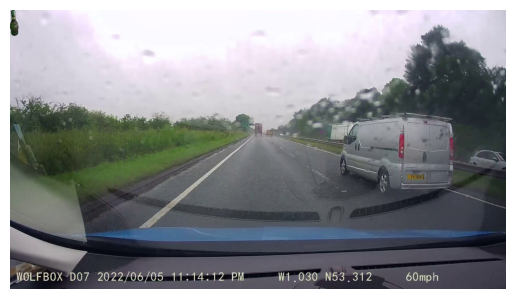

In [15]:
newVerge = verge.copy()
newVerge[0:min_height,0:min_width] = new
plt.axis('off')
plt.imshow(newVerge)

In [16]:
#TO DO: Random Placement,blurring, bbox placement and conversion into yolo
#place manually then constant velocity model?